# K-Means exercise


In the file "segmentation_homework.csv" you are given a data related to the customers of the local grocery store. The data consists of two columns- Satisfaction and Loyalty.
Satisfaction ranges  from 1 to 10 where 1 means not satisfied at all and 10 corresponds to extremely satisfied.It takes integer values.
Brand loyalty is measured by #purchases for 1 year+ other factors.It ranges from -2.5 to 2.5 as it is already standardized.


# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing 

# Load the dataset

In [2]:
data=pd.read_csv(r'segmentation_homework.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


# Plot the data

Here we can identify two clusters - the first consists of points
around the top right corner, whereas the second of points 
around the bottom left corner.But still the first cluster cannot be labeled properly as the points falling in it are too random.So it seems a two-cluster solution won't cut it.

Text(0, 0.5, 'Loyalty')

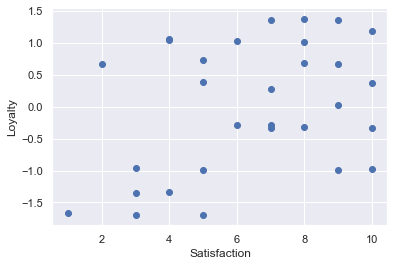

In [4]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# Select the features

We make a copy of our initial data and call it 'x'.


In [5]:
x=data.copy()

# Clustering

In [6]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Standardize the variables

Each column will be standardized with respect to itself.

'x_scaled' contains the standardized 'Satisfaction' and the same values for 'Loyalty'.

In [8]:
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# The Elbow method

Here 10 is an arbitrary decision.

In [9]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.363006425346784,
 4.315662464700005,
 3.8430322397539265]

Plot the WCSS versus the number of clusters.

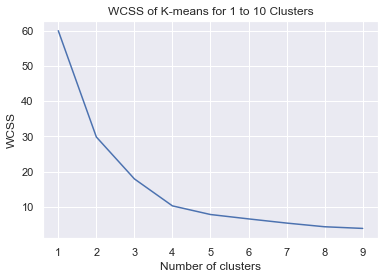

In [10]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title("WCSS of K-means for 1 to 10 Clusters")
plt.show()

We can see that 2,3,4,5 are possible numbers of clusters but we do not know which solution is the best one.

Try 2 clusters first and then explore the results of 3,4,5 clusters.

In [11]:
kmeans_new=KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)

An important note here is that the predicted clusters 
are based on the standardized data whereas 'Satisfaction' 
and 'Loyalty' columns contain their original values.

In [12]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


We will plot the data without standardizing the axes
but the solution will be the standardized one.

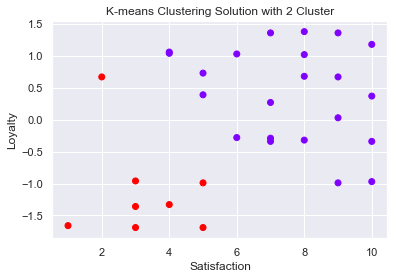

In [18]:
plt.scatter(clusters_new['Satisfaction'],
            clusters_new['Loyalty'],
            c=clusters_new['cluster_pred'],
            cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('K-means Clustering Solution with 2 Cluster')
plt.show()

We get the intuition for how satisfied the customers were.
We often choose to plot using the original values for clearer
interpretability.Naming the clusters is very important.
After the algorithm is done we need to interpret the result.
In this case we can call the red cluster 'Alienated' as they are dissatisfied and not loyal. In other words it is unlikely that they will come back to our shop.
We call the purple cluster 'The everything else cluster' because it is so heterogeneous.

Now re-run the above code with 3,4,5 clusters.

Here we show the result of having 4 clusters.


In [14]:
kmeans_new_2=KMeans(4)
kmeans_new_2.fit(x_scaled)
clusters_new_2=x.copy()
clusters_new_2['cluster_pred']=kmeans_new_2.fit_predict(x_scaled)

In [15]:
clusters_new_2

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


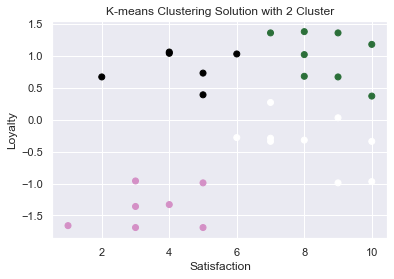

In [22]:
plt.scatter(clusters_new_2['Satisfaction'],
            clusters_new_2['Loyalty'],
            c=clusters_new_2['cluster_pred'],
            cmap='cubehelix')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('K-means Clustering Solution with 2 Cluster')
plt.show()

Naming the clusters:

Yellow is again 'Alienated'.

Purple is 'Supporters'-people who are not particularly 
happy with the shopping experience, but they like the brand 
and want to keep coming back.

Blue is 'Fans'- the core cluster which we are most interested in.
We hope all the points on this graph will turn into fans.

Red is 'Roamers'-people who like my brand but are not very loyal to it.


Summarizing, we see that 4 and 5 clusters are the best solutions. Which one we decide to use depends on the problem at hand!